# About
This notebook specifically includes example of how random shuffles influence the predicted epislon value and intermap predictions, including demonstrating how the `null_shuffle` keyword in the FINCHES frontened `interaction_figure()` function works.

Specifically, this notebook generates

* Fig. S4B
* Fig. S12F

In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.4

matplotlib.rcParams['xtick.major.size'] = 0.5 # length of major xticks
matplotlib.rcParams['xtick.major.width'] = 0.25   # width of major xticks
matplotlib.rcParams['ytick.major.size'] = 0.5  # length of major yticks
matplotlib.rcParams['ytick.major.width'] = 0.25   # width of major yticks


# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

from tqdm import tqdm
import pickle
from sparrow import Protein
import protfasta

In [2]:
from finches.frontend.mpipi_frontend import Mpipi_frontend
from finches.frontend.calvados_frontend import CALVADOS_frontend

In [3]:
def generate_shuffles(seq, n_shuffles=100):
    local_seqs = []
    
    for i in range(n_shuffles):
        local_seqs.append(''.join(np.random.permutation(list(seq))))

    return local_seqs

In [4]:
mf = Mpipi_frontend()
cf = CALVADOS_frontend()

/Users/alex/Dropbox/WASHU/Holehouse/tools/finches/finches/finches/forcefields/calvados.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882254706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  r.loc['H','q'] = 1. / ( 1 + 10**(self.pH-6) )


# Sequence specificity for DDX4
The cells below describe sequence-specific effects for DDX4

In [5]:
DDX4_WT = 'MGDEDWEAEINPHMSSYVPIFEKDRYSGENGDNFNRTPASSSEMDDGPSRRDHFMKSGFASGRNFGNRDAGECNKRDNTSTMGGFGVGKSFGNRGFSNSRFEDGDSSGFWRESSNDCEDNPTRNRGFSKRGGYRDGNNSEASGPYRRGGRGSFRGCRGGFGLGSPNNDLDPDECMQRTGGLFGSRRPVLSGTGNGDTSQSRSGSGSERGGYKGLNEEVITGSGKNSWKSEAEGGES'
DDX4_CS = 'MGDRDWRAEINPHMSSYVPIFEKDRYSGENGRNFNDTPASSSEMRDGPSERDHFMKSGFASGDNFGNRDAGKCNERDNTSTMGGFGVGKSFGNEGFSNSRFERGDSSGFWRESSNDCRDNPTRNDGFSDRGGYEKGNNSEASGPYERGGRGSFDGCRGGFGLGSPNNRLDPRECMQRTGGLFGSDRPVLSGTGNGDTSQSRSGSGSERGGYKGLNEKVITGSGENSWKSEARGGES'

In [6]:
eps_distribution = []
for s in tqdm(generate_shuffles(DDX4_WT, n_shuffles=20000)):
    eps_distribution.append(mf.epsilon(s,s))

DDX4_WT_eps = mf.epsilon(DDX4_WT,DDX4_WT)
DDX4_CS_eps = mf.epsilon(DDX4_CS,DDX4_CS)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [04:04<00:00, 81.67it/s]


### Fig. S4B histogram (top right)
Generates histogram showing the extent of sequence-specificity and how WT vs. CS variants sit within that distribution.

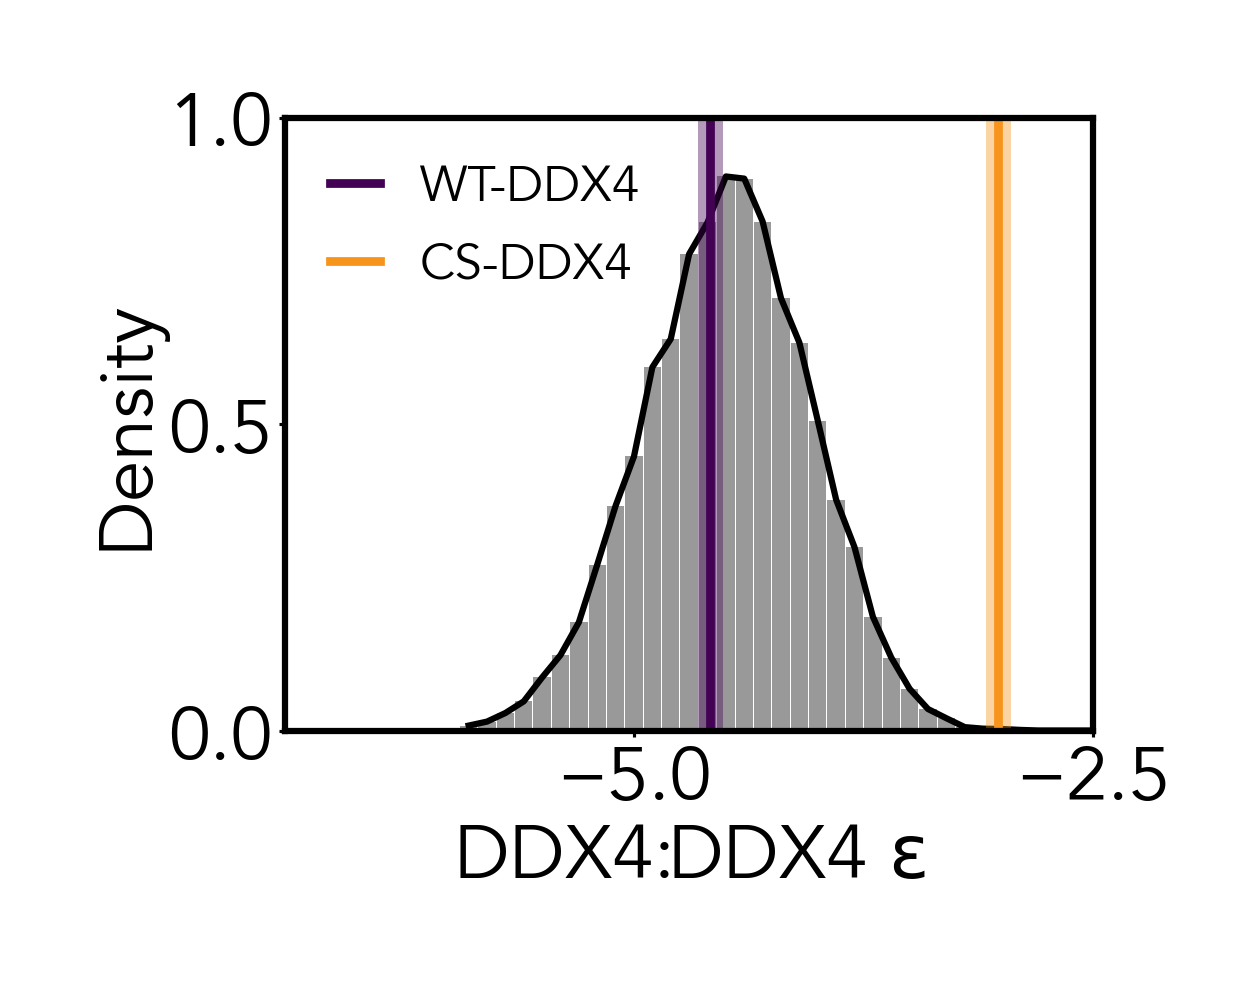

In [7]:
figure(None, (1.5,1.2), dpi=450)
ax = plt.gca()
bw = 0.1
bins = np.arange(-6,-2,bw)
[a,b] = np.histogram(eps_distribution,bins=bins,density=True)
plt.bar(b[1:],a, color='k',alpha=0.4, width=bw*0.95)
plt.plot(b[1:],a, color='k', lw=0.5,)
ax.axvline(DDX4_WT_eps, color='#430254',lw=0.7, label='WT-DDX4')
ax.axvline(DDX4_WT_eps, color='#430254',lw=2, alpha=0.4)
ax.axvline(DDX4_CS_eps, color='#F7941C',lw=0.7, label='CS-DDX4')
ax.axvline(DDX4_CS_eps, color='#F7941C',lw=2, alpha=0.4)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.ylim([0,1])
plt.xlim([-6.9,-2.5])
plt.legend(frameon=False, fontsize=4, handlelength=1)
plt.xlabel(r'DDX4:DDX4 $\rm\epsilon$', fontsize=6, labelpad=0)
plt.ylabel('Density', fontsize=6, labelpad=0)
ax.tick_params(axis='x', pad=0.5)  # Adjust pad to desired spacing
ax.tick_params(axis='y', pad=0.5)  # Adjust pad to desired spacing

plt.tight_layout()
plt.savefig('out_figures/ddx4_shuffle_histogram.pdf')
           

## Fig. S4B intermaps DDX4 WT (normal vs. after null correction) (middle)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:35<00:00, 13.90it/s]


(<Figure size 2975x2975 with 1 Axes>,
 <Axes: >)

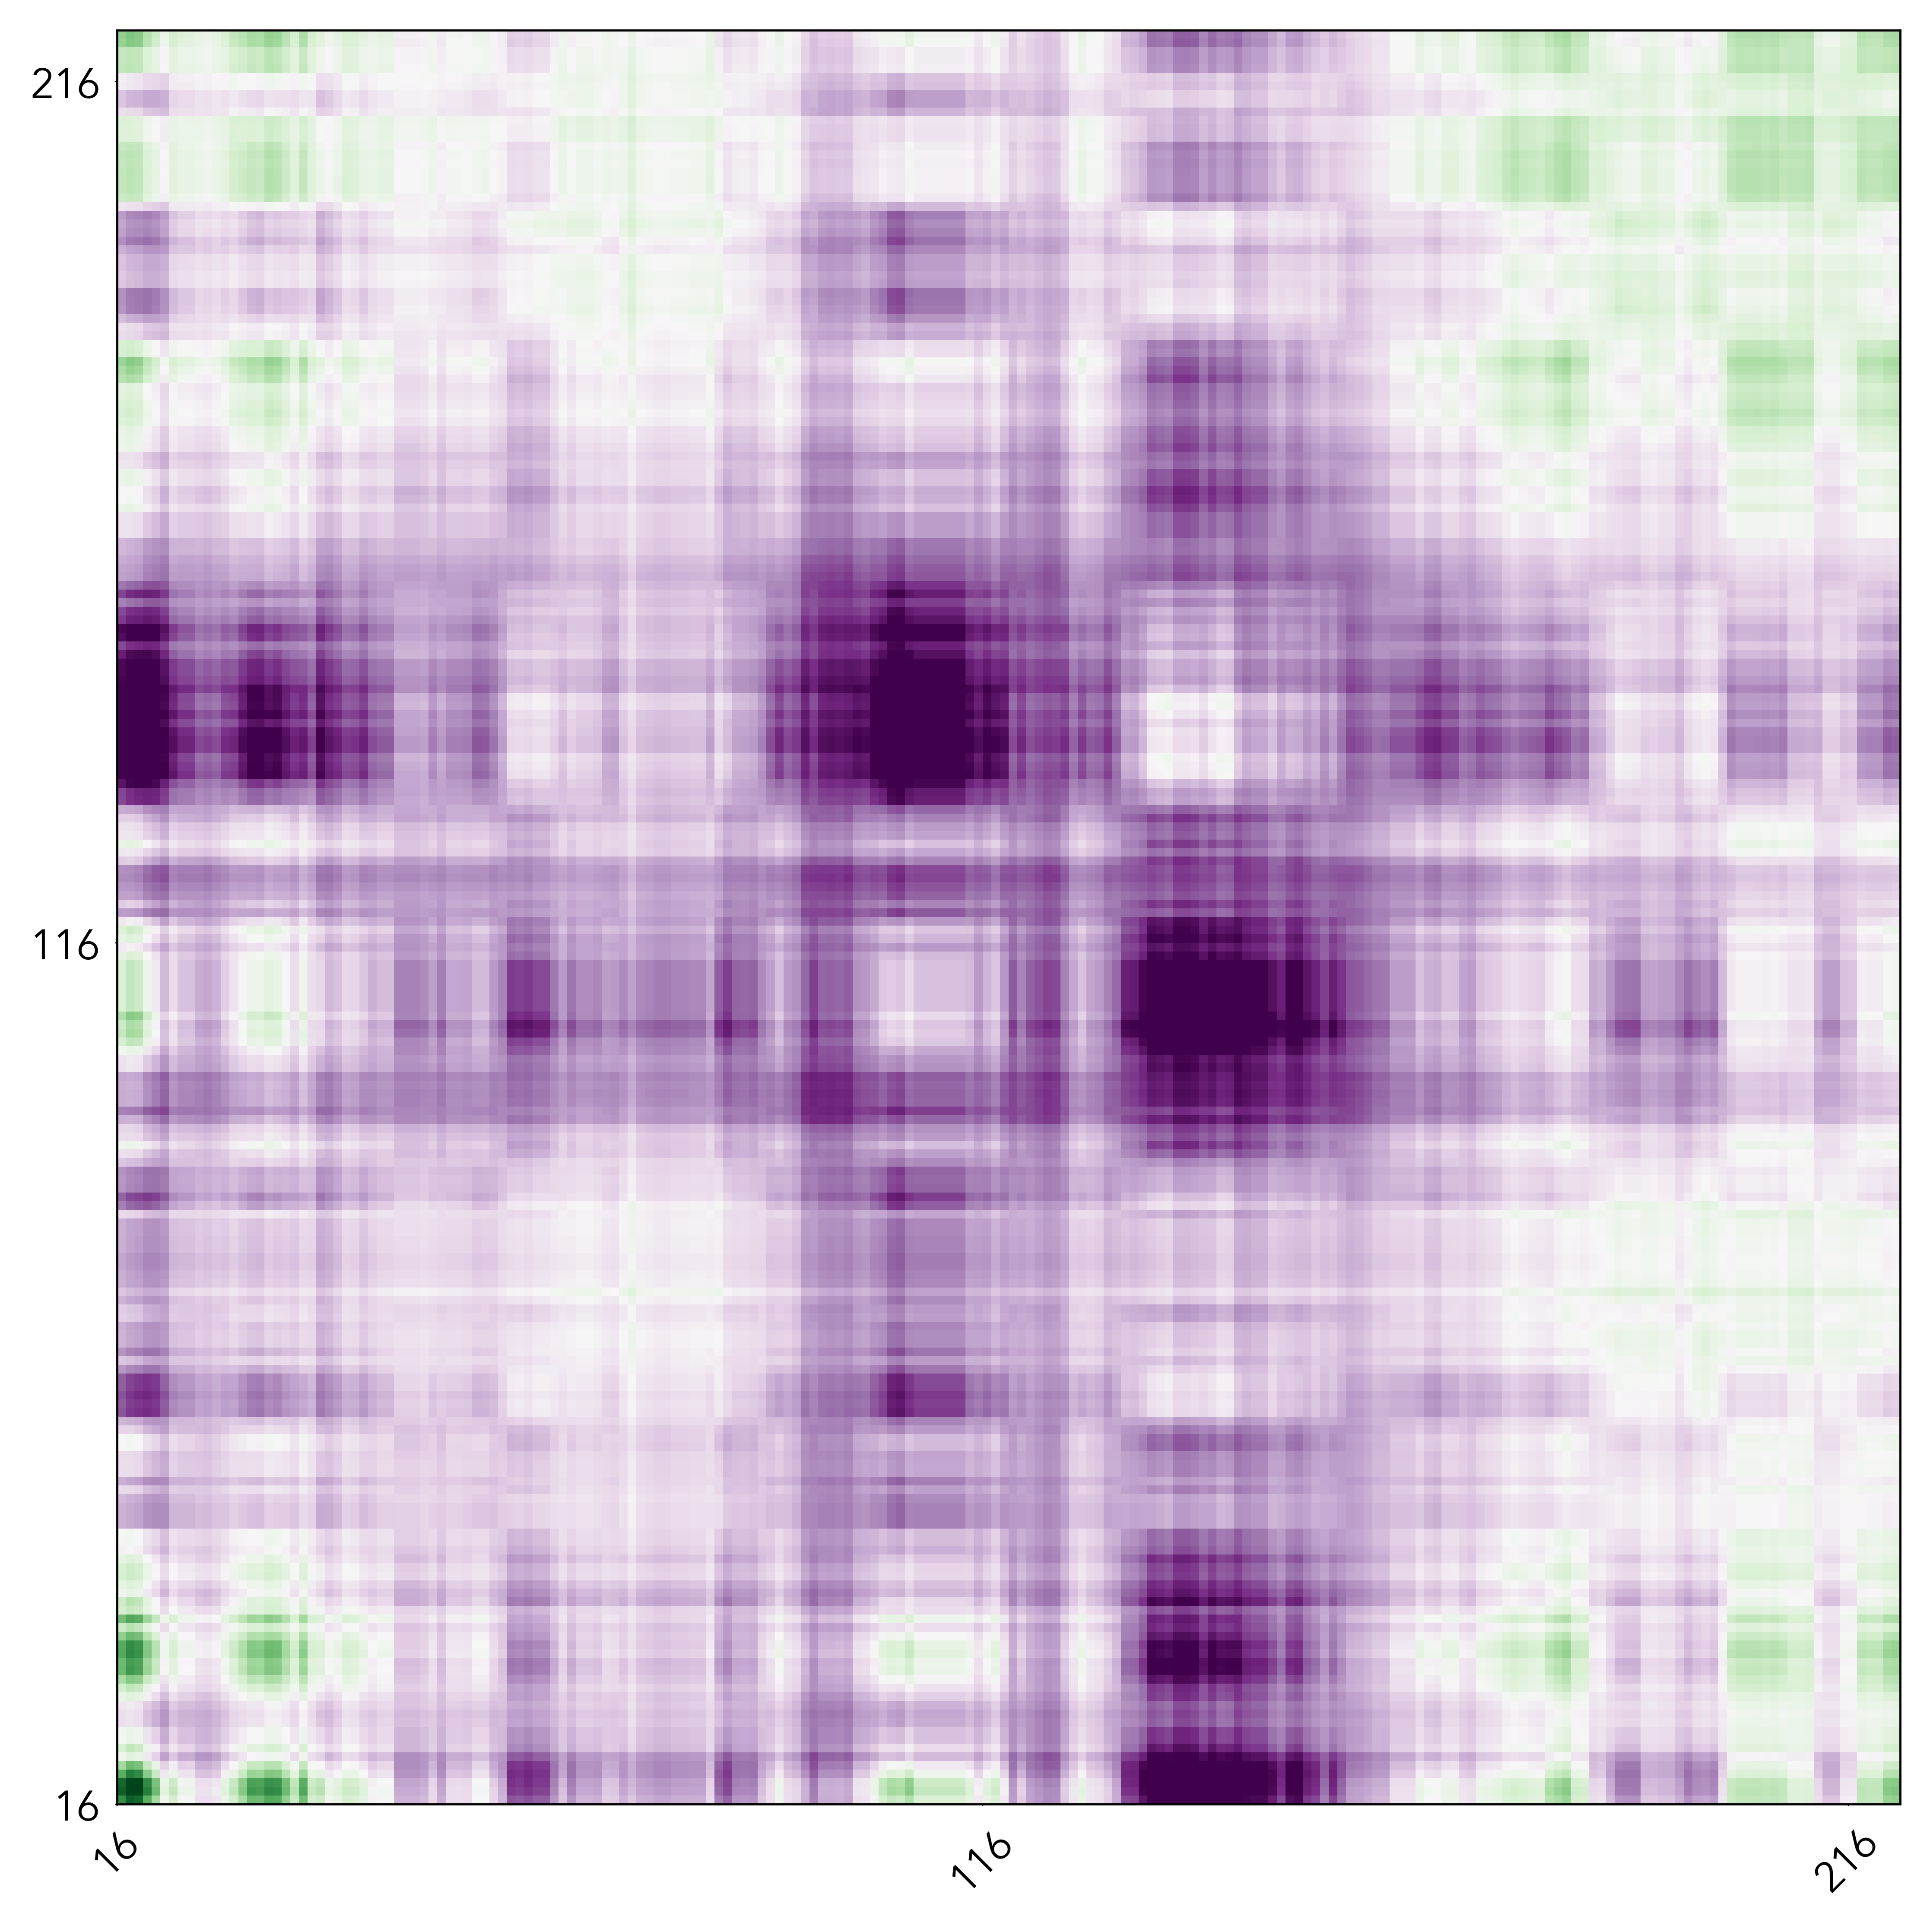

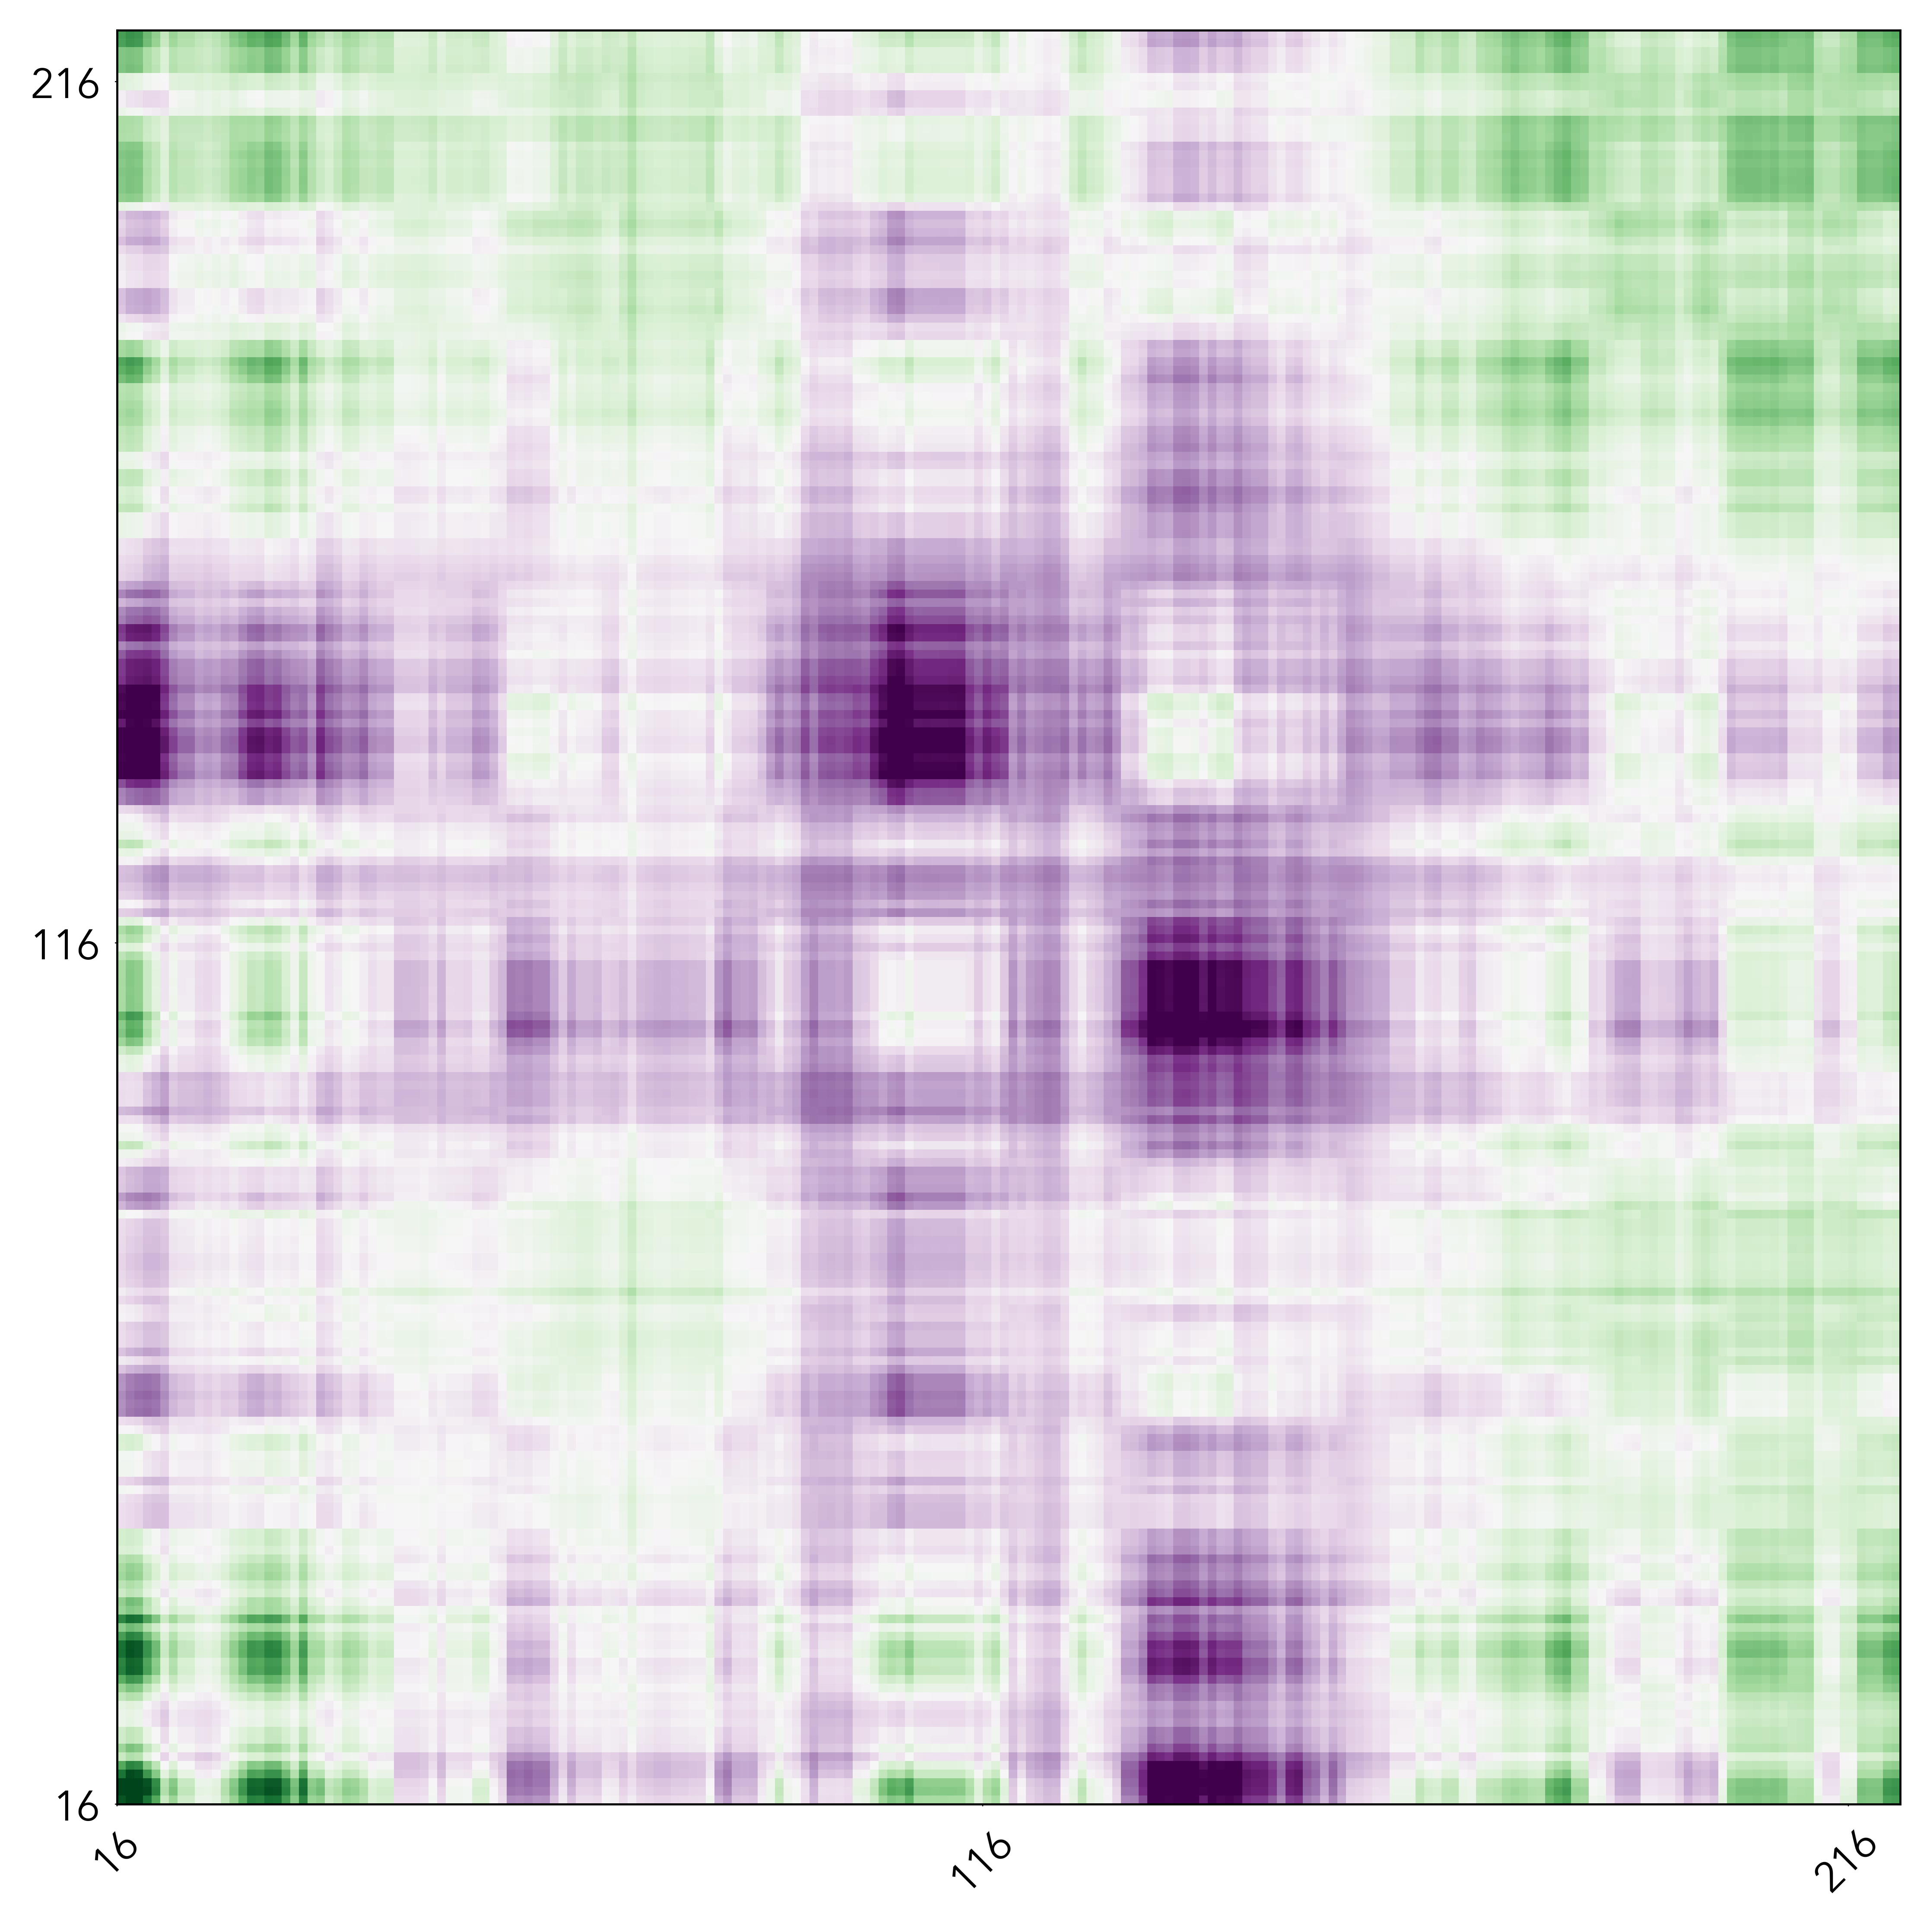

In [8]:
mf.interaction_figure(DDX4_WT, DDX4_WT, no_disorder=True,fname='out_figures/ddx4_raw.pdf')
mf.interaction_figure(DDX4_WT, DDX4_WT, no_disorder=True,null_shuffle=500,fname='out_figures/ddx4_with_null.pdf')

## Fig. S4B intermaps DDX4 CS (normal vs. after null correction) (bottom)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:35<00:00, 13.92it/s]


(<Figure size 2975x2975 with 1 Axes>,
 <Axes: >)

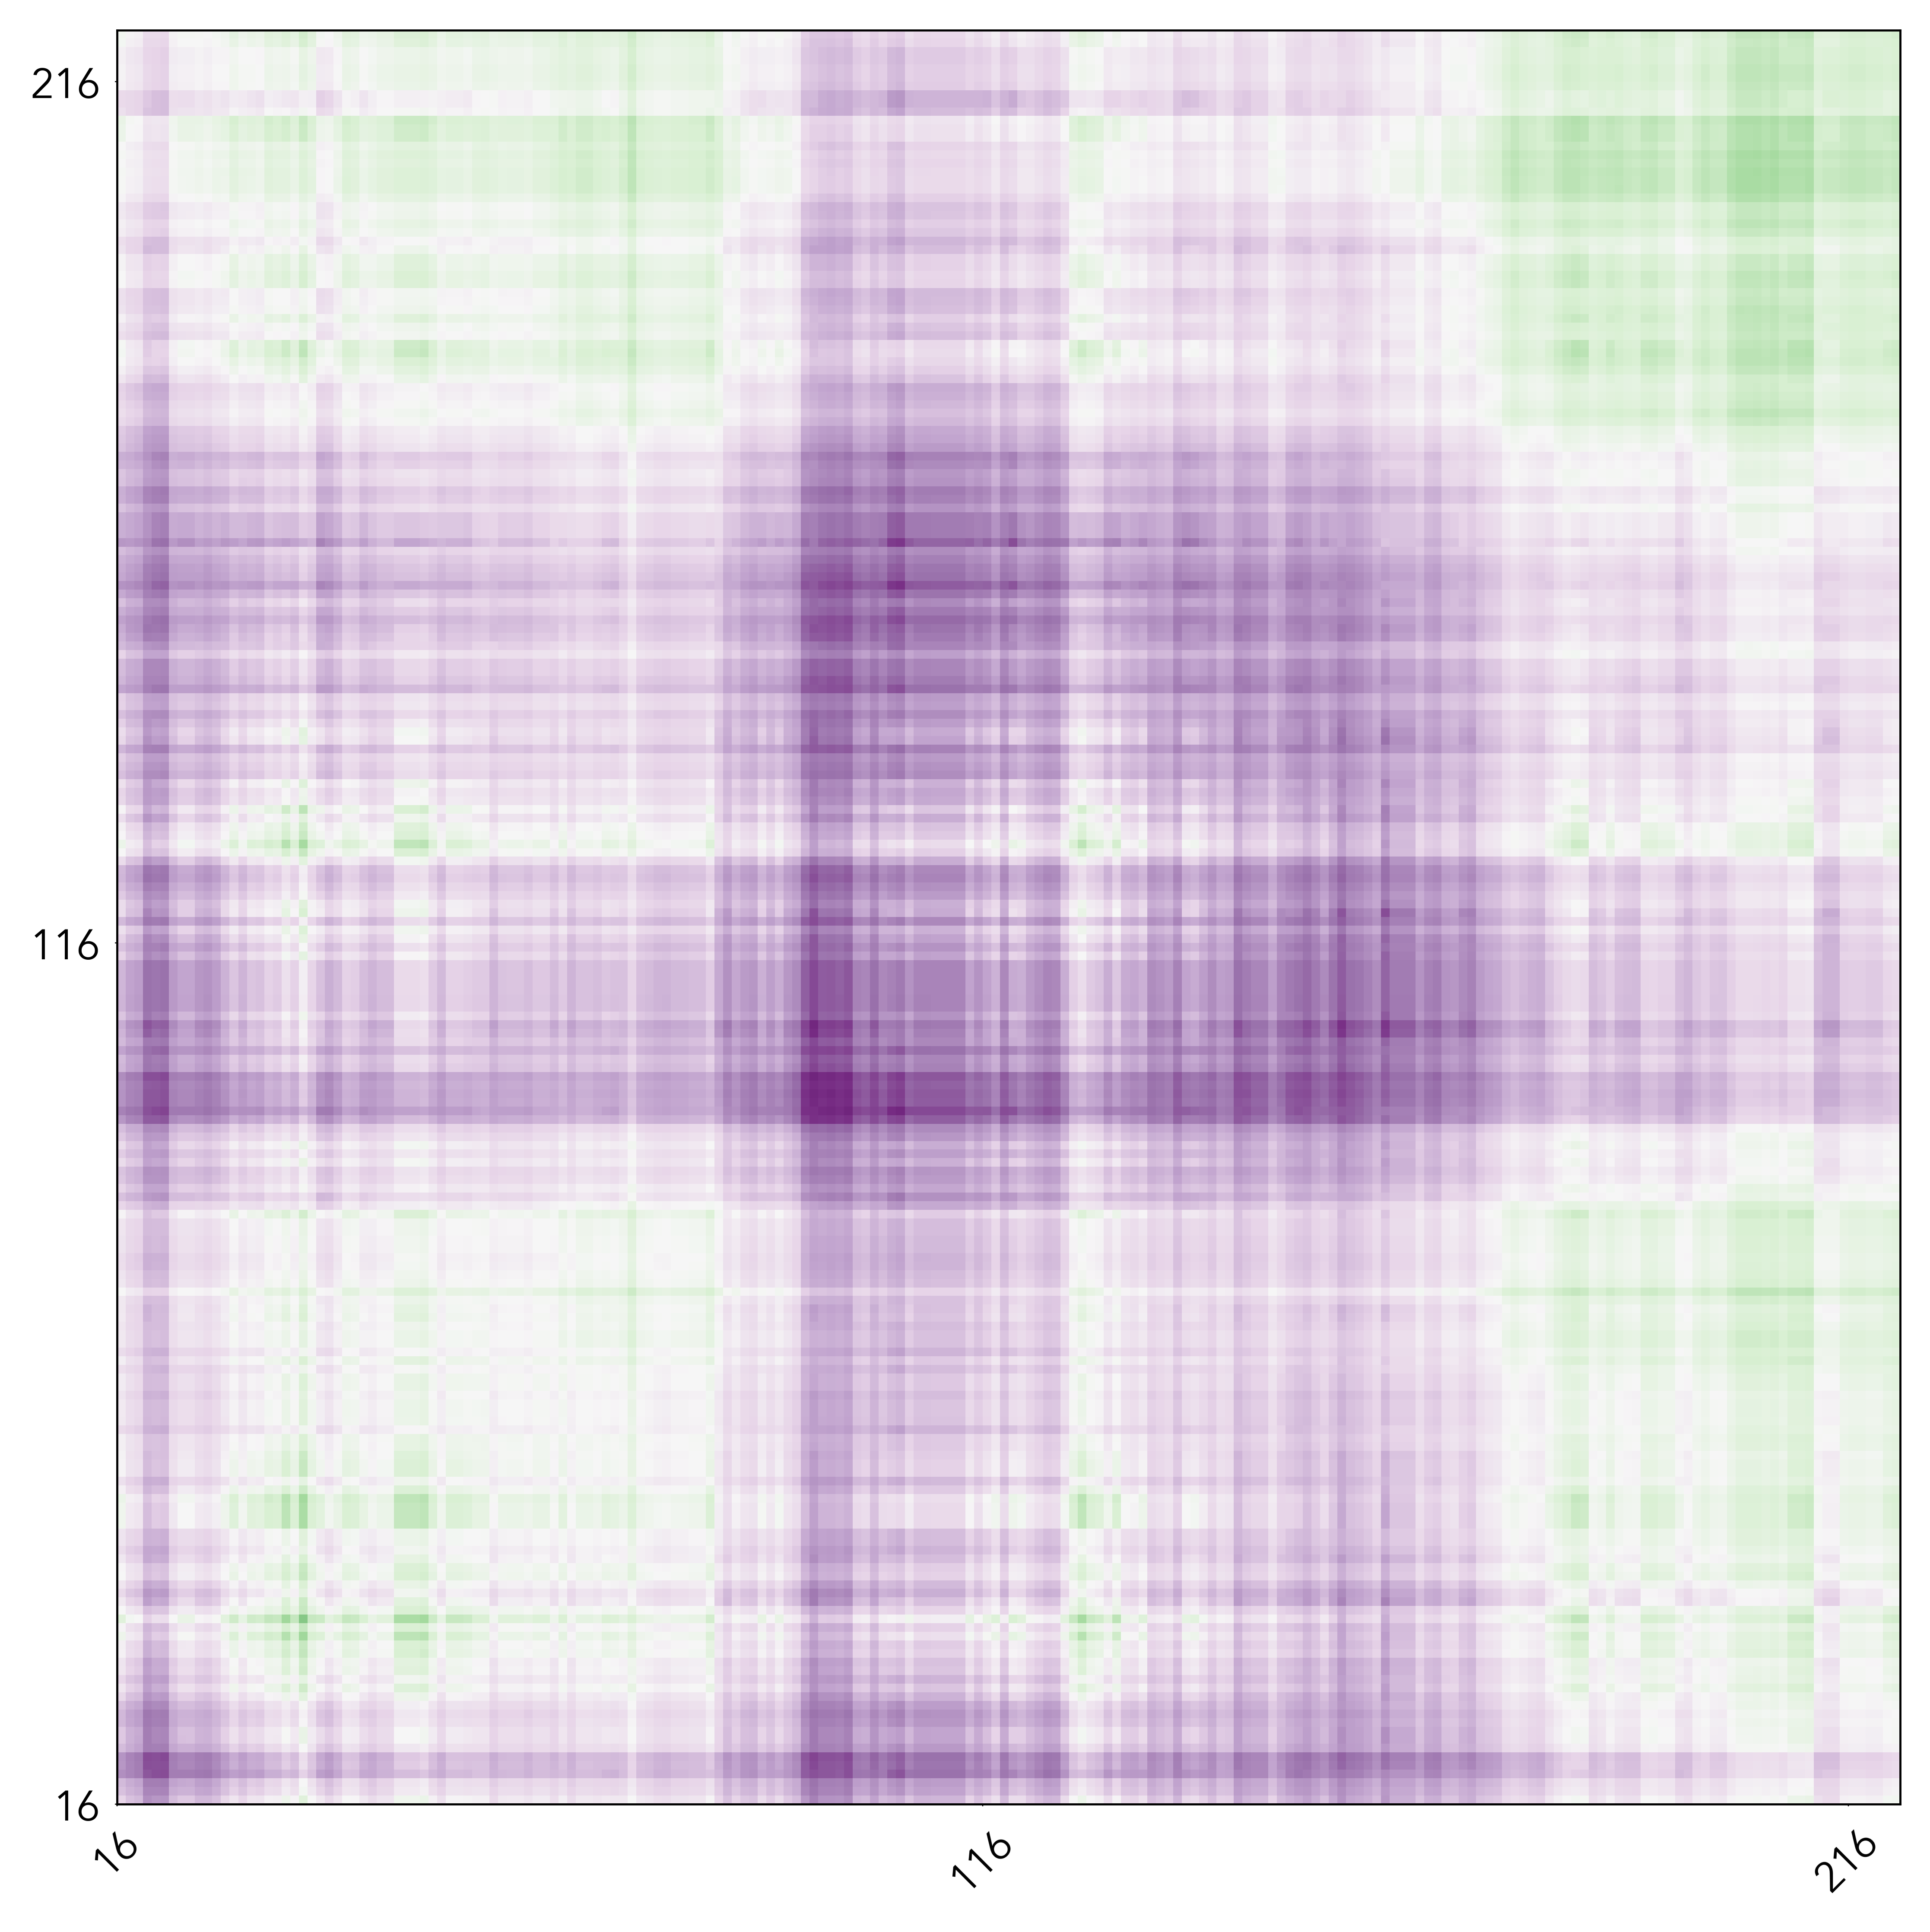

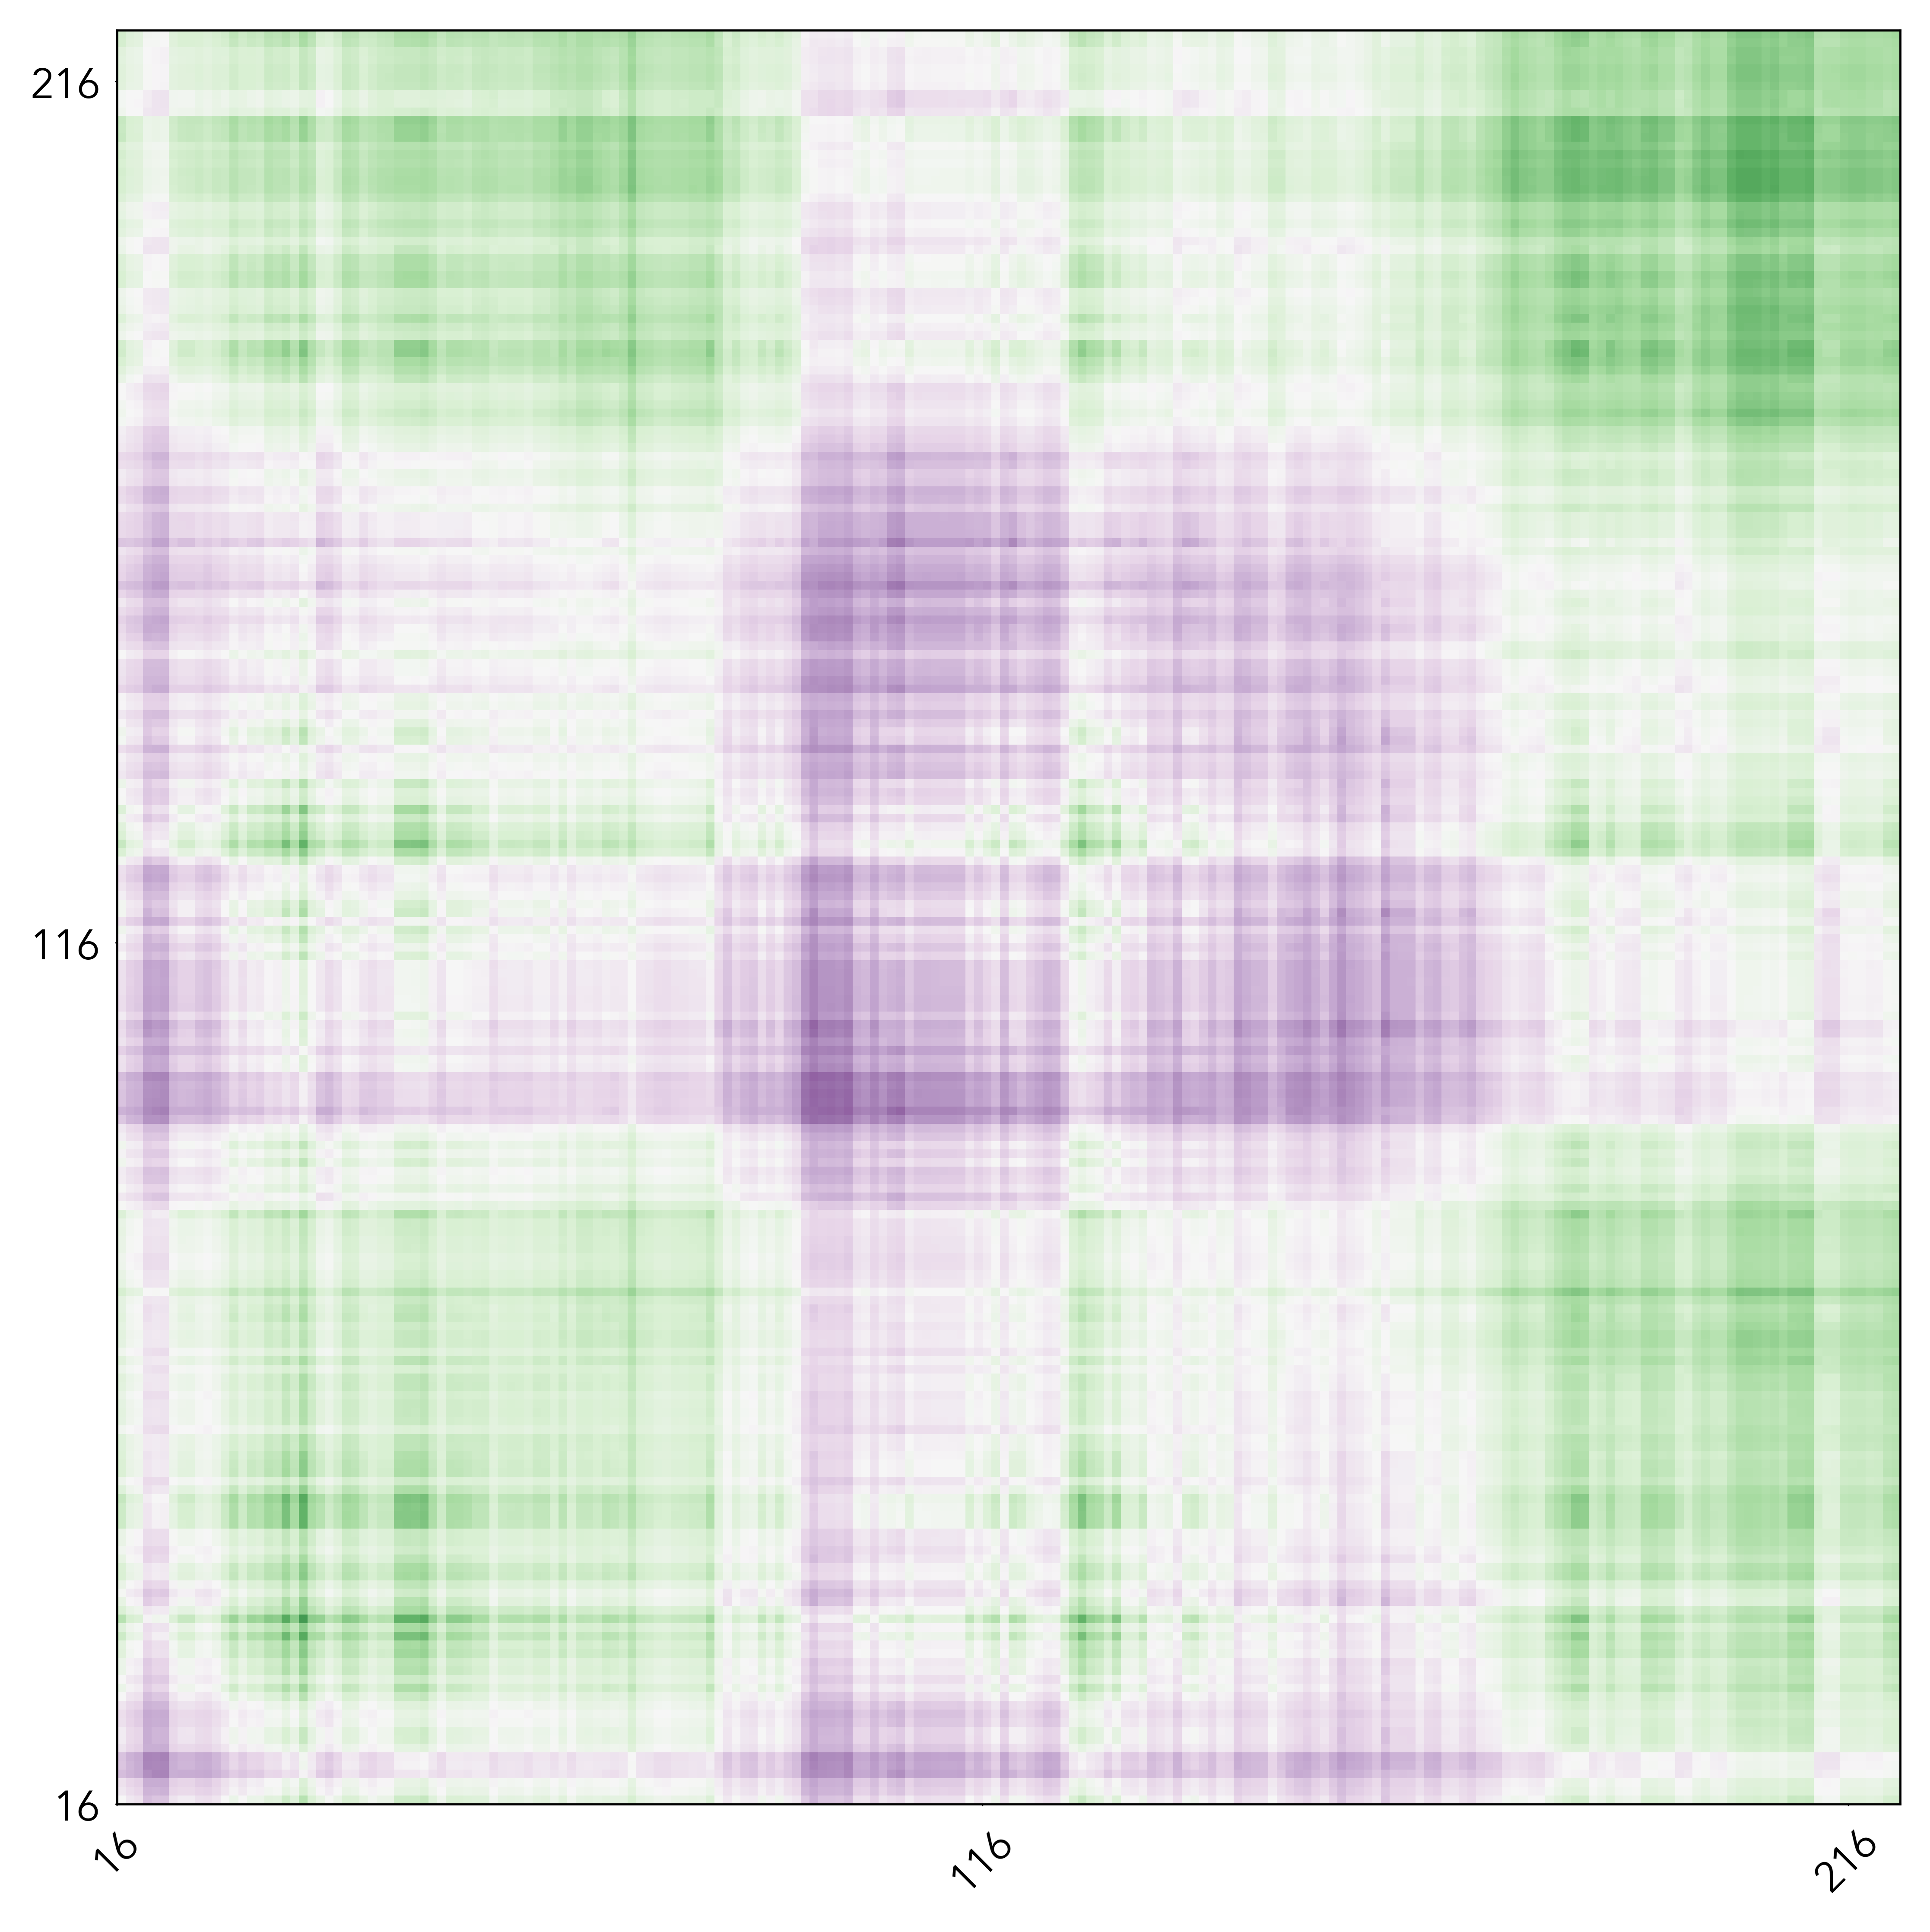

In [9]:
mf.interaction_figure(DDX4_CS, DDX4_CS, no_disorder=True,fname='out_figures/ddx4_CS_raw.pdf')
mf.interaction_figure(DDX4_CS, DDX4_CS, no_disorder=True,null_shuffle=500,fname='out_figures/ddx4_CS_with_null.pdf')


# Sequence specificity for ProTa:H1 interaction
The cells below describe sequence-specific effects for heterotypic interaction (histone H1 vs. protA)

In [11]:
ProtA = 'MSDAAVDTSSEITTKDLKEKKEVVEEAENGRDAPANGNAENEENGEQEADNEVDEEEEEGGEEEEEEEEGDGEEEDGDEDEEAESATGKRAAEDDEDDDVDTKKQKTDEDD'
h1_fl = 'CTENSTSAPAAKPKRAKASKKSTDHPKYSDMIVAAIQAEKNRAGSSRQSIQKYIKSHYKVGENADSQIKLSIKRLVTTGVLKQTKGVGASGSFRLAKSDEPKKSVAFKKTKKEIKKVATPKKASKPKKAASKAPTKKPKATPVKKAKKKLAATPKKAKKPKTVKAKPVKASKPKKAKPVKPKAKSSAKRAGKKKGGPR'


In [12]:
eps_distribution = []

# we use 141 shuffles. Why 141 is not clear to me.... but that's what we did...
prot_A_shuffles = generate_shuffles(ProtA, n_shuffles=141)
h1_shuffles = generate_shuffles(h1_fl, n_shuffles=141)

for s1 in tqdm(prot_A_shuffles):
    for s2 in h1_shuffles:
        eps_distribution.append(mf.epsilon(s1,s2))

ProtA_h1_eps = mf.epsilon(ProtA,h1_fl)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 141/141 [02:41<00:00,  1.14s/it]


## Fig. S12F

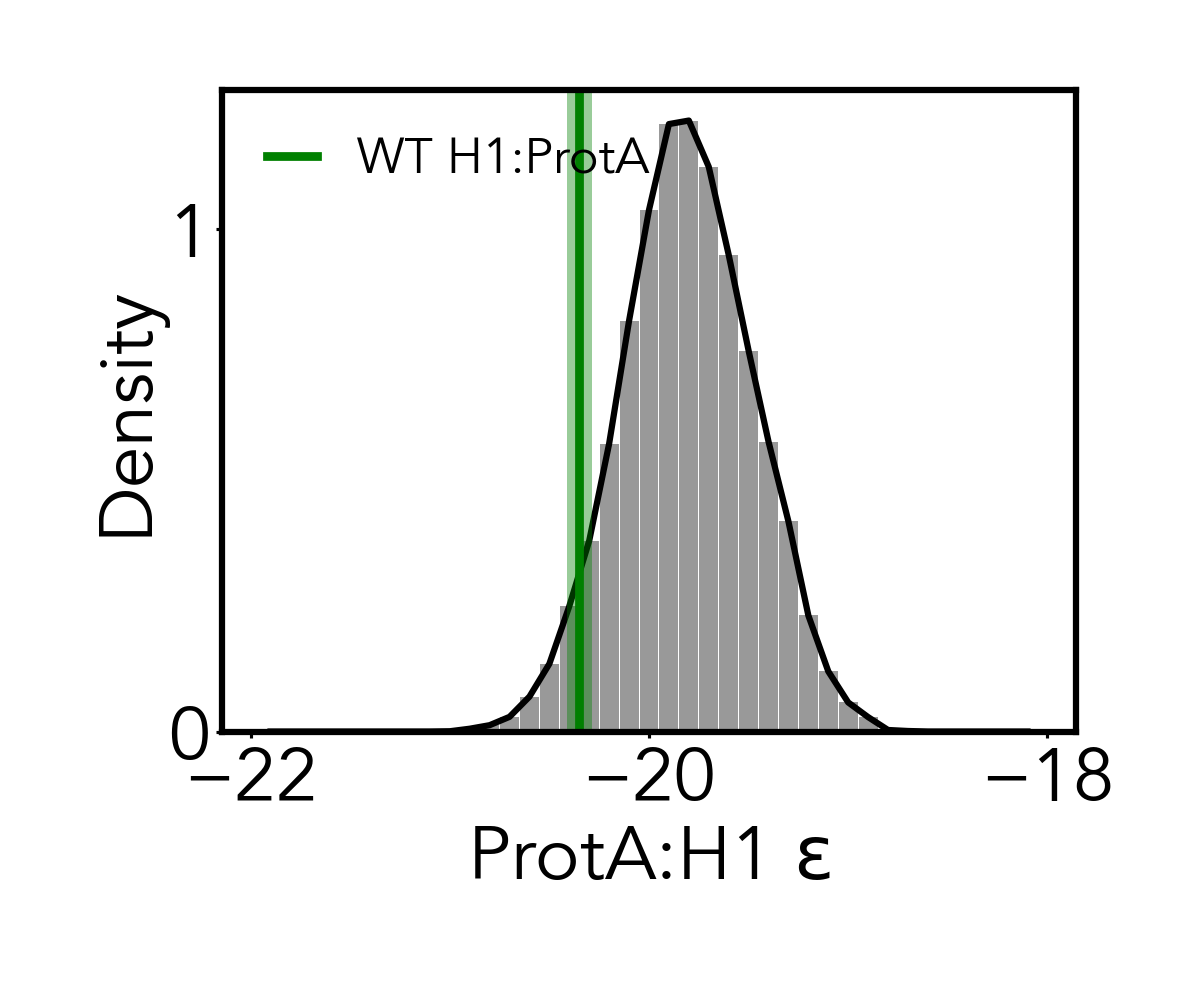

In [13]:
figure(None, (1.5,1.2), dpi=450)
ax = plt.gca()
bw = 0.1
bins = np.arange(-22,-18,bw)
[a,b] = np.histogram(eps_distribution,bins=bins,density=True)
plt.bar(b[1:],a, color='k',alpha=0.4, width=bw*0.95)
plt.plot(b[1:],a, color='k', lw=0.5,)
ax.axvline(ProtA_h1_eps, color='green',lw=0.7, label='WT H1:ProtA')
ax.axvline(ProtA_h1_eps, color='green',lw=2, alpha=0.4)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
#plt.ylim([0,1])
#plt.xlim([-6.9,-2.5])
plt.legend(frameon=False, fontsize=4, handlelength=1)
plt.xlabel(r'ProtA:H1 $\rm\epsilon$', fontsize=6, labelpad=0)
plt.ylabel('Density', fontsize=6, labelpad=0)
ax.tick_params(axis='x', pad=0.5)  # Adjust pad to desired spacing
ax.tick_params(axis='y', pad=0.5)  # Adjust pad to desired spacing

plt.tight_layout()
plt.savefig('out_figures/wt_protA_H1_shuffle_histogram.pdf')
           